**LOAD THE IMAGE DATASET**

**Import the required libraries**

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

**Load the dataset and display a sample image to confirm it's loaded correctly**

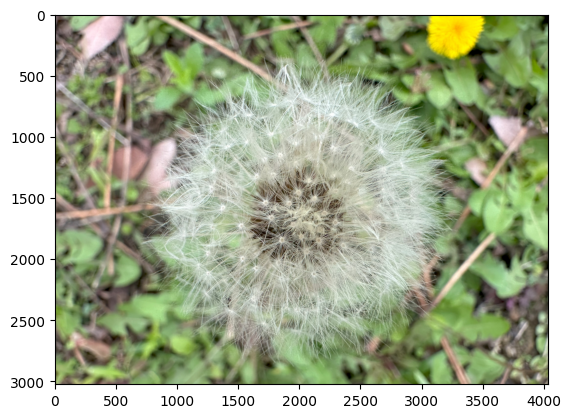

In [ ]:
dataset_path = '/Users/bevdeq/Desktop/dataset2' # Change if testing
image_files = os.listdir(dataset_path)

# Read and display the first image to check
sample_image = cv2.imread(os.path.join(dataset_path, image_files[0]))
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.show()


**RESHAPE IMAGES TO (100, 100, 3)**

**Function to Reshape Image**

In [12]:
def reshape_image(image, size=(100, 100)):
    return cv2.resize(image, size)

**Loop through the dataset, reshape the images, and save them as JPEG files in a new directory**

In [13]:
output_path = 'reshaped_images'
os.makedirs(output_path, exist_ok=True)

for file in image_files:
    img = cv2.imread(os.path.join(dataset_path, file))
    img_resized = reshape_image(img)
    cv2.imwrite(os.path.join(output_path, file), img_resized)


In [14]:
def add_black_patch(image, patch_size=(20, 20)):
    h, w, _ = image.shape
    x = random.randint(0, w - patch_size[0])
    y = random.randint(0, h - patch_size[1])
    image[y:y + patch_size[1], x:x + patch_size[0]] = (0, 0, 0)
    return image


In [15]:
def shift_image(image, shift_x=10, shift_y=10):
    h, w = image.shape[:2]
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    return cv2.warpAffine(image, M, (w, h))


In [16]:
def rotate_image(image, angle):
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(image, M, (w, h))


In [17]:
def flip_image(image, mode):
    if mode == 'horizontal':
        return cv2.flip(image, 1)
    elif mode == 'vertical':
        return cv2.flip(image, 0)


In [19]:
augmented_path = 'augmented_dataset'
os.makedirs(augmented_path, exist_ok=True)

In [20]:
for file in os.listdir(output_path):
    img = cv2.imread(os.path.join(output_path, file))
    
    # Original image
    cv2.imwrite(os.path.join(augmented_path, file), img)

    # Augmented images
    cv2.imwrite(os.path.join(augmented_path, f'patch_{file}'), add_black_patch(img.copy()))
    cv2.imwrite(os.path.join(augmented_path, f'shift_{file}'), shift_image(img.copy(), 20, 20))
    cv2.imwrite(os.path.join(augmented_path, f'rotate30_{file}'), rotate_image(img.copy(), 30))
    cv2.imwrite(os.path.join(augmented_path, f'rotate60_{file}'), rotate_image(img.copy(), 60))
    cv2.imwrite(os.path.join(augmented_path, f'flip_h_{file}'), flip_image(img.copy(), 'horizontal'))
    cv2.imwrite(os.path.join(augmented_path, f'flip_v_{file}'), flip_image(img.copy(), 'vertical'))


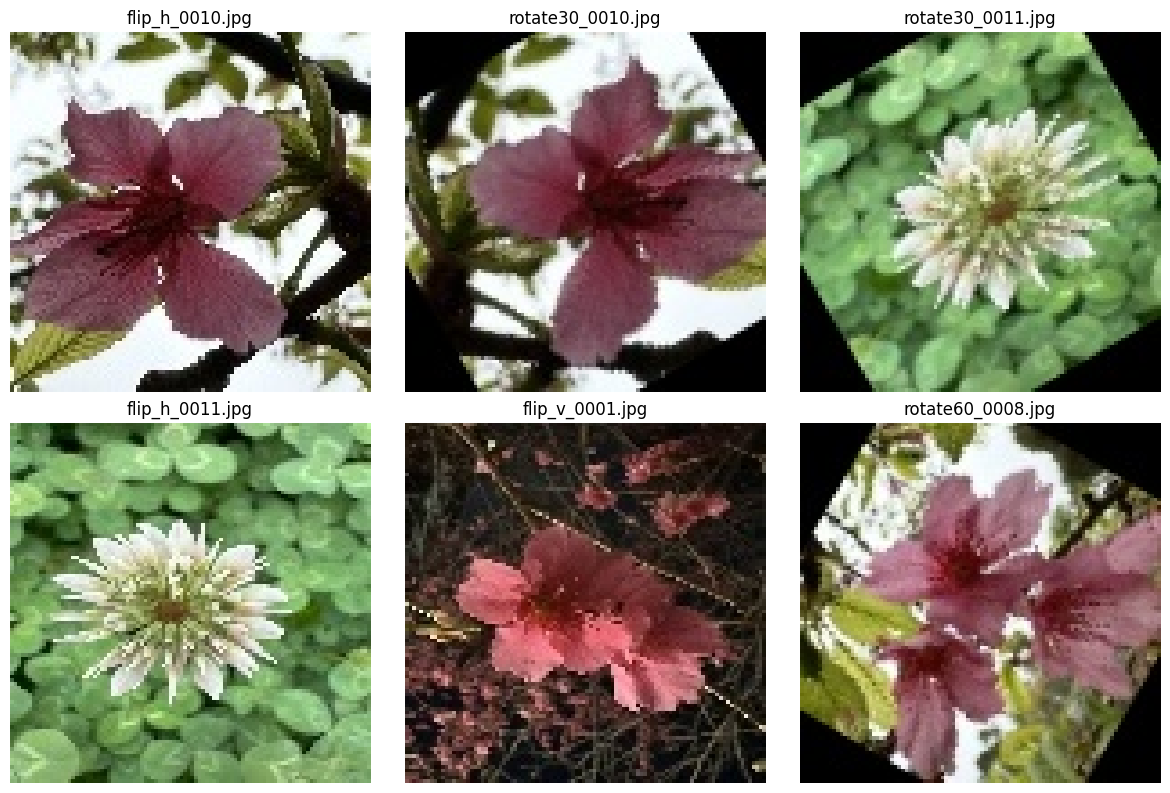

In [21]:
sample_augmented = os.listdir(augmented_path)[:6]
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, file in enumerate(sample_augmented):
    img = cv2.imread(os.path.join(augmented_path, file))
    axs[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i // 3, i % 3].set_title(file)
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()
